# Atividade Machine Learning: Titanic

## Visão Geral

#### Descrição da base

O naufrágio do Titanic é um dos naufrágios mais famosos da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado "inafundável" RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na morte de 1.502 dos 2.224 passageiros e tripulantes.

Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas tinham mais probabilidade de sobreviver do que outros.

Assim, o dataset Titanic possui informações (nome, idade, sexo, classe socioeconômica, etc.) sobre os passageiros presentes no na embarcação. Será que, com base nesses dados, é possível prever que tipo de pessoa tem mais probabilidade de sobreviver?

#### Objetivo

O intuito desta atividade é fazer uma análise sobre quais variáveis tiveram maior influência na probabilidade de sobrevivência (ou seja, que tipo de pessoa teve mais chance de escapar com vida).

Após analisar os dados, espera-se também que você seja capaz de construir um modelo que dê a previsão de sobrevivência para um passageiro qualquer que seja fornecido como input.

## Análise do Dataset

#### Carregar Bibliotecas

In [62]:
import jupyter
import sklearn
import scipy
import matplotlib
import numpy as np
import pandas as pd
import sys
import seaborn as sns
 
#from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from matplotlib import pyplot as plt

#### Carregar Dataset

In [260]:
url = "https://raw.githubusercontent.com/profmoisesomena/escience_and_tools/master/data/titanic_dados_t.csv"
names = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
dataset = pd.read_csv(url, header=0, names=names)

#### Exibindo número de linhas e de colunas

In [261]:
print(dataset.shape)

(891, 12)


#### Significado dos dados

- **PassengerId**: Número de identificação do passageiro
- **Survived**: Informa se o passageiro sobreviveu ao desastre 
    - 0 = Não
    - 1 = Sim
- **Pclass**: Classe do bilhete
    - 1 = 1ª Classe
    - 2 = 2ª Classe
    - 3 = 3ª Classe
- **Name**: Nome do passageiro
- **Sex**: Sexo do passageiro
- **Age**: Idade do passageiro
- **SibSp**: Quantidade de cônjuges e irmãos a bordo
- **Parch**: Quantidade de pais e filhos a bordo
- **Ticket**: Número da passagem
- **Fare**: Preço da Passagem
- **Cabin**: Número da cabine do passageiro
- **Embarked**: Porto no qual o passageiro embarcou
    - C = Cherbourg
    - Q = Queenstown
    - S = Southampton

Atributo alvo: **Survived**

#### Exibindo primeiros elementos

In [262]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Observando os dados, temos que os tipos dos atributos são:
- Numérico:
    - 4 variáveis discretas: passengerid, pclass, sibSp e parch
    - 2 variáveis contínuas: fare e age
- Categórico:
    - 1 binário: survived
    - 5 variáveis nominais: name, sex, ticket, cabin, embarked.

#### Exibindo dados estatísticos

In [263]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Podemos notar que na coluna fare a média é 31,64 sendo que a mediana esta em 14,45. Isso significa que temos valores discrepantes distorcendo a distribuição dos valores desta variável. Além disso, outro ponto importante de observar é que a coluna Age possui valores faltantes.

#### Exibindo informações sobre o tipo dos dados

In [264]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Além dos dados faltantes na coluna Age, temos valores nulos em Cabin e Embarked.

#### Verificando porcentagem de dados faltantes

In [265]:
dataset.isnull().sum() / dataset.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

As colunas Cabin e Embarked possuem, respectivamente, 77% e 2% de dados faltantes. Além dessas, há aproximadamente 20% de passageiros sem informações sobre a idade.

## Pré-processamento do Dataset

PassengerId: atributo irrelevante
Survived: ok
Pclass: ok
Name: tratar?
Sex: transformar em numero
Age: tratar valores faltantes
SibSp: 
Parch: 
Ticket: 
Fare: 
Cabin: tratar valores faltantes
Embarked: tratar valores faltantes

#### Tratamentos

#### Age

Text(0, 0.5, 'Idade (Age)')

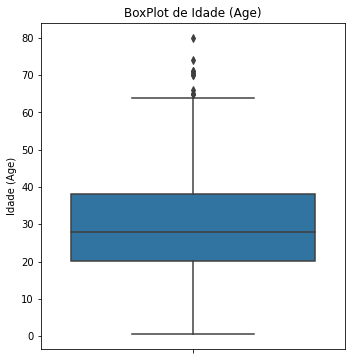

In [266]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
fig = sns.boxplot(y='Age', data=dataset, orient='v')
fig.set_title('BoxPlot de Idade (Age)')
fig.set_ylabel('Idade (Age)')

Text(0.5, 1.0, 'Distribuição de Idade (Age)')

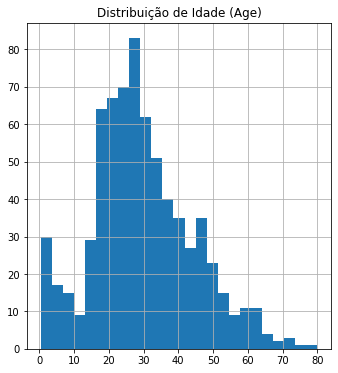

In [267]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
fig = dataset.Age.hist(bins=25)
fig.set_title('Distribuição de Idade (Age)')

In [268]:
age_by_pclass_sex = dataset.groupby(['Sex', 'Pclass']).mean()['Age']
print(age_by_pclass_sex)

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64


In [269]:
age_by_pclass_sex = dataset.groupby(['Sex', 'Pclass']).mean()['Age']

dataset['Age'] = dataset.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.mean()))

#### Cabin

In [270]:
dataset.groupby('Cabin').size()

Cabin
A10    1
A14    1
A16    1
A19    1
A20    1
      ..
F33    3
F38    1
F4     2
G6     4
T      1
Length: 147, dtype: int64

In [271]:
dataset['Cabin'] = dataset['Cabin'].str[0].str.upper().str.strip()
dataset.groupby('Pclass')['Cabin'].value_counts()

Pclass  Cabin
1       C        59
        B        47
        D        29
        E        25
        A        15
        T         1
2       F         8
        D         4
        E         4
3       F         5
        G         4
        E         3
Name: Cabin, dtype: int64

Cabines por classe:
- Classe 1 - A, B, C, D, E, T
- Classe 2 - D, E, F
- Classe 3 - E, G, F

In [272]:
dataset['Cabin'] = dataset['Cabin'].fillna('N')

In [273]:
dataset.isnull().sum() / dataset.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.000000
Embarked       0.002245
dtype: float64

In [274]:
dataset.groupby('Cabin').size()

Cabin
A     15
B     47
C     59
D     33
E     32
F     13
G      4
N    687
T      1
dtype: int64

In [275]:
cabin_dummies = pd.get_dummies(dataset['Cabin'], prefix='Cabin')
dataset = pd.concat([dataset, cabin_dummies], axis=1)
dataset.drop('Cabin', axis=1, inplace=True)

In [276]:
dataset.drop('Cabin_T', axis=1, inplace=True)

#### Sex

In [277]:
dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1})

#### Embarked

In [278]:
dataset.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [279]:
embarked_dummies = pd.get_dummies(dataset['Embarked'], prefix='Embarked')
dataset = pd.concat([dataset, embarked_dummies], axis=1)
dataset.drop('Embarked', axis=1, inplace=True)

In [280]:
display(dataset.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,1,0,0,1


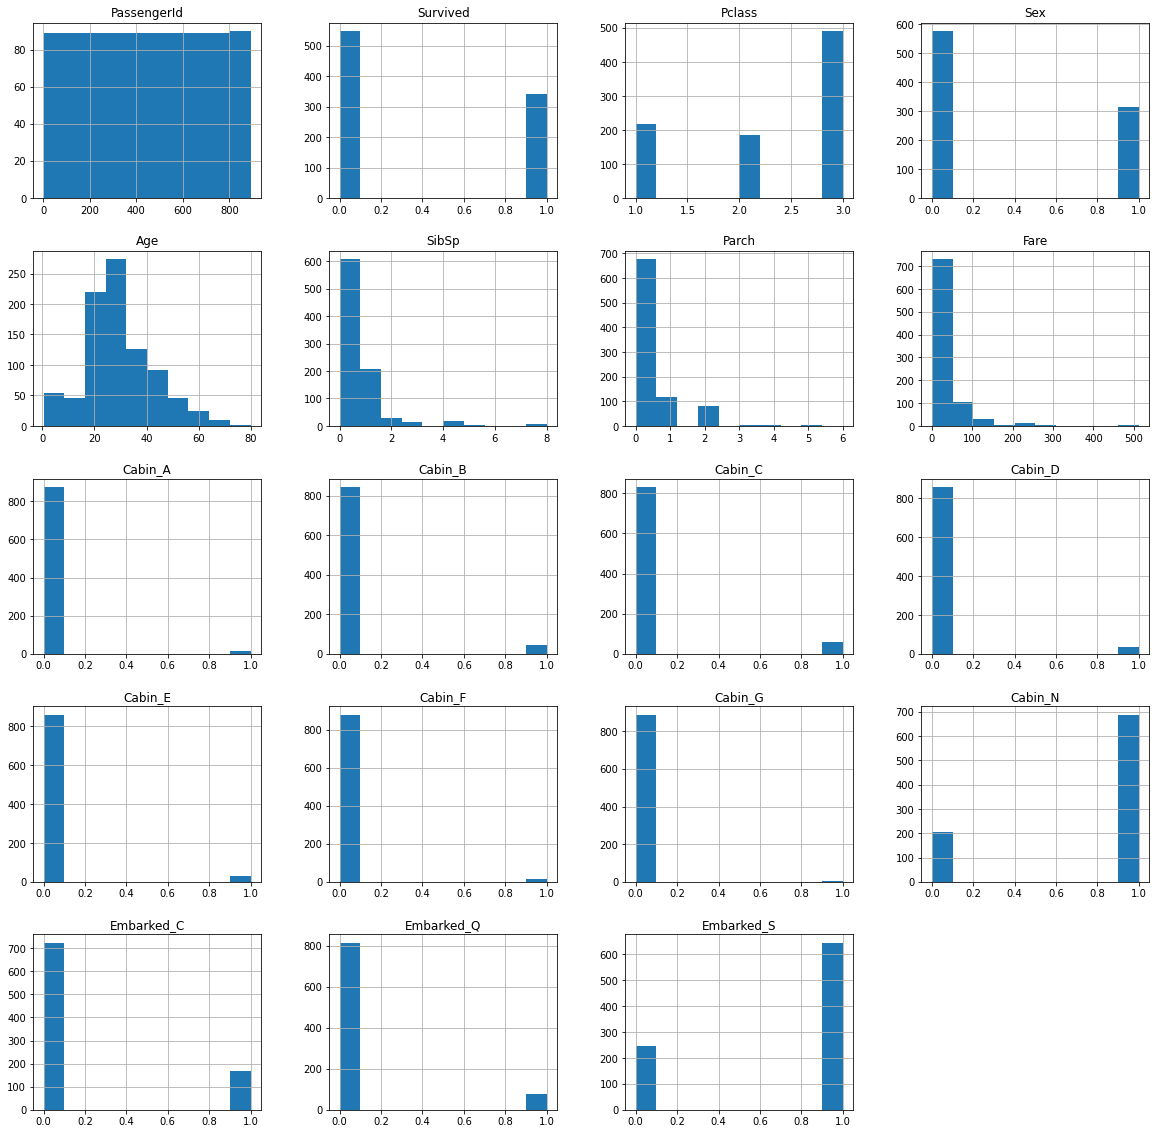

In [281]:
dataset.hist(figsize=(20,20))
pyplot.show()

In [282]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin_A      891 non-null    uint8  
 11  Cabin_B      891 non-null    uint8  
 12  Cabin_C      891 non-null    uint8  
 13  Cabin_D      891 non-null    uint8  
 14  Cabin_E      891 non-null    uint8  
 15  Cabin_F      891 non-null    uint8  
 16  Cabin_G      891 non-null    uint8  
 17  Cabin_N      891 non-null    uint8  
 18  Embarked_C   891 non-null    uint8  
 19  Embarked

# Colunas categoricas

In [283]:
dataset.drop('PassengerId', axis=1, inplace=True)
dataset.drop('Name', axis=1, inplace=True)
dataset.drop('Ticket', axis=1, inplace=True)

In [284]:
display(dataset.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,0,0,0,0,0,1,0,0,1
1,1,1,1,38.0,1,0,71.2833,0,0,1,0,0,0,0,0,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,0,0,0,0,0,1,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,0,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,0,0,0,0,0,1,0,0,1


# Análise gráfica

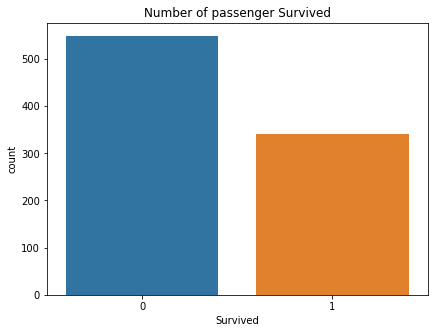

In [285]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x="Survived", data=dataset)
plt.title('Number of passenger Survived');

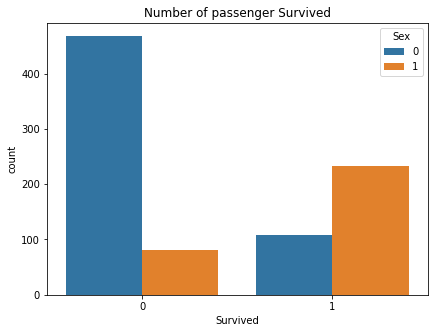

In [286]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Sex", data=dataset)
plt.title('Number of passenger Survived');

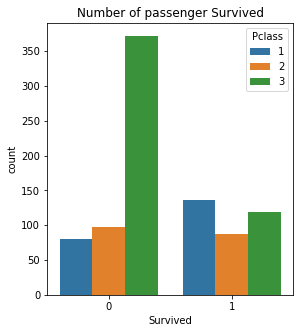

In [289]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,3)
sns.countplot(x="Survived", hue="Pclass", data=dataset)
plt.title('Number of passenger Survived');

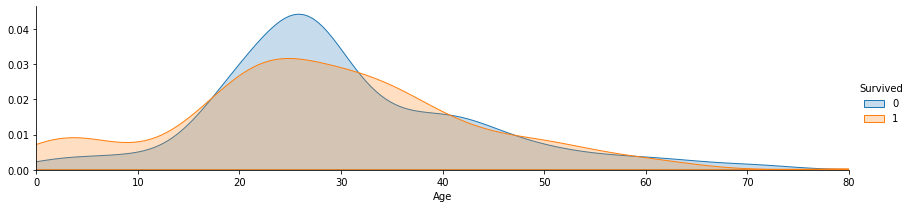

In [290]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( dataset, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , dataset['Age'].max()))
a.add_legend()